In [48]:
#Import necessay libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
#Load dataset
df= pd.read_csv('C:/Users/KELECHI/Documents/Salary_Prediction/survey_results_public.csv')

In [50]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [51]:
#Keeping the neccessary columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [52]:
df= df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedComp', 'Age']]
df= df.rename({"ConvertedComp" : 'Salary'}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,25.0
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN,31.0


In [53]:
df= df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0,36.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0,22.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0,23.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0,49.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0,53.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
 5   Age           30596 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.9+ MB


In [55]:
#I dropped because we have enough data point
df= df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
Age             0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29986 entries, 7 to 64152
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       29986 non-null  object 
 1   EdLevel       29986 non-null  object 
 2   YearsCodePro  29986 non-null  object 
 3   Employment    29986 non-null  object 
 4   Salary        29986 non-null  float64
 5   Age           29986 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.6+ MB


In [57]:
#creating a new column from Employemnt then dropping employment
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26487 entries, 7 to 64152
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26487 non-null  object 
 1   EdLevel       26487 non-null  object 
 2   YearsCodePro  26487 non-null  object 
 3   Salary        26487 non-null  float64
 4   Age           26487 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [58]:
df.Age.value_counts()

30.0    1727
28.0    1717
25.0    1677
26.0    1644
27.0    1614
        ... 
84.0       1
96.0       1
23.8       1
32.5       1
89.0       1
Name: Age, Length: 77, dtype: int64

In [59]:
# Remove rows with Age < 18 or Age > 100
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]


In [60]:
df['Country'].value_counts()

United States     6716
United Kingdom    2063
India             1983
Germany           1722
Canada            1038
                  ... 
Bahamas              1
Guinea               1
Benin                1
Namibia              1
Yemen                1
Name: Country, Length: 148, dtype: int64

In [61]:
#getting rid of smaller point so it wont confuse our model
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Others'
    return categorical_map


In [62]:
country_map = shorten_categories(df['Country'].value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df['Country'].value_counts()

Others                7443
United States         6716
United Kingdom        2063
India                 1983
Germany               1722
Canada                1038
France                 889
Brazil                 885
Spain                  606
Netherlands            589
Australia              582
Poland                 512
Italy                  502
Russian Federation     469
Sweden                 455
Name: Country, dtype: int64

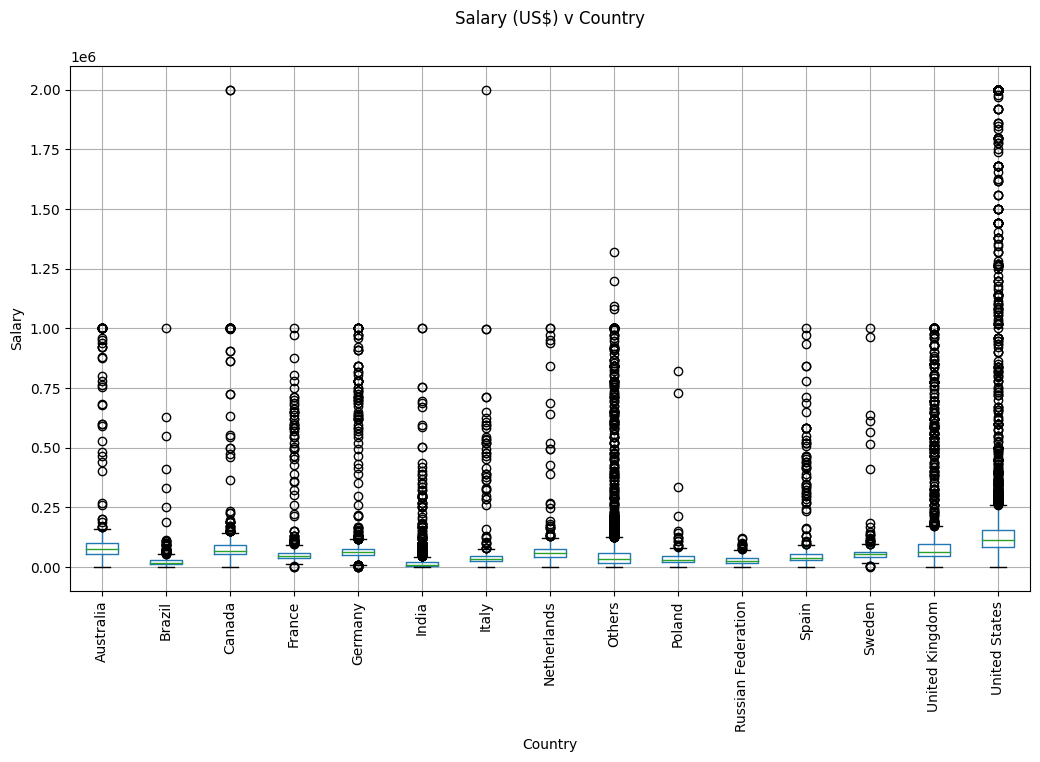

In [63]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

From the boxplot the most data point are in 0.25 that is 250,000, so we are using it as range .

In [64]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

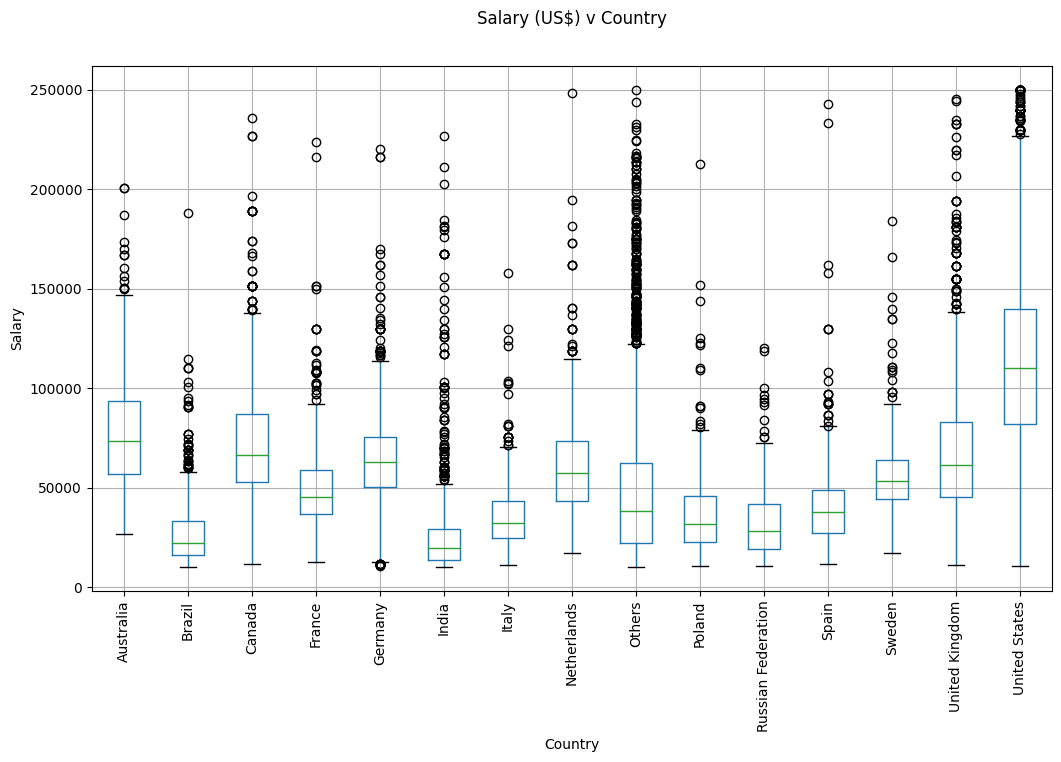

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [66]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '6', '28',
       '8', '23', '15', '25', '5', '9', '11', 'Less than 1 year', '21',
       '16', '18', '32', '19', '22', '38', '30', '26', '17', '27', '24',
       '34', '29', '35', '33', '36', '40', '31', '37', '41', '45', '39',
       '42', 'More than 50 years', '43', '44', '50'], dtype=object)

we have string value, so we are cleaning it to float.

In [67]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [68]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

we will categories the EDLevel for easy model handling.

In [69]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [70]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

Transforming our string column to numerical value.

In [71]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [72]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3,  5, 12,  9,  0, 10])

spliting our data 

In [73]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [74]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [75]:
y_pred = linear_reg.predict(X)

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$38,326.60


In [77]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [78]:
y_pred = dec_tree_reg.predict(X)

In [79]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$23,994.08


In [80]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [81]:
y_pred = random_forest_reg.predict(X)

In [82]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$24,774.11


In [83]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [84]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$30,146.44


In [85]:
X

,Country,EdLevel,YearsCodePro,Age
7,14,0,13.0,36.0
9,13,2,4.0,22.0
10,13,0,2.0,23.0
11,11,1,7.0,49.0
12,7,1,20.0,53.0
...,...,...,...,...
61921,6,2,6.0,36.0
61993,13,0,7.0,31.0
62212,8,0,5.0,30.0
63402,14,1,7.0,32.0


In [86]:
# country, edlevel, yearscode, age
X = np.array([["United States", 'Master’s degree', 15 , 30]])
X

array([['United States', 'Master’s degree', '15', '30']], dtype='<U15')

In [87]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[14.,  2., 15., 30.]])

In [88]:
import joblib

In [89]:
joblib.dump({"model": regressor, "le_country": le_country, "le_education": le_education}, "saved_steps.joblib")

['saved_steps.joblib']

In [90]:
data = joblib.load("saved_steps.joblib")

In [91]:


regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [92]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\KELECHI\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([145332.08080808])